# Môn: Máy học nâng cao
* Sinh viên: Huỳnh Thị Bảo Trân
* MSSV: 19110482
* Bài thực hành: Lab08

**LAB 08: REFORCEMENT LEARNING**

1. Tìm hiểu về OpenAI
2. Chơi thử trò SmartCar
3. Làm quen với Naive và Q-Learning


* OpenAI là 1 công cụ được tạo ra nhằm giúp những nhà nghiên cứu dễ dàng hơn trong việc có 1 benchmark tốt bằng cách tạo một môi trường ổn định, có cách cài đặt đơn giản. Mục đích của công cụ này là giúp tăng khả năng reproduce lại các kết quả trong lĩnh vực AI, cũng như cung cấp 1 công cụ giúp chúng ta dễ dàng thao tác với các môi trường AI hơn. 


In [ ]:
!sudo apt update && sudo apt install xvfb

Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:4 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic/main Sources [2,235 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:12 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic/main amd64 Packages [1,143 kB]
Hit:13 https://develop

In [ ]:
#Cài đặt thư viện 
!pip install gym-notebook-wrapper pygame -q

     |████████████████████████████████| 21.8 MB 13.5 MB/s 
     |████████████████████████████████| 1.6 MB 43.5 MB/s 


Chúng ta sẽ nói về một environment đơn giản, có số state và số action hữu hạn (và khá nhỏ) là Taxi-v2. Trong environment này, agent của chúng ta đóng vai trò 1 tài xế taxi. Có 4 địa điểm cố định khác nhau trên bản đồ (được ký hiệu R, G, Y, B), và mỗi khi environment bắt đầu, sẽ có 2 điểm bất kỳ là điểm đón và trả khách (2 điểm này có thể trùng nhau), cũng như vị trí của taxi cũng là vị trí bất kỳ. Nhiệm vụ của chúng ta là đón hành khách (ở điểm màu xanh da trời) và trả khách (ở điểm màu tím).

Agent của chúng ta có thể thực hiện 6 actions:

0: xuống dưới

1: lên trên

2: sang trái

3: sang phải

4: đón khách

5: trả khách

Reward của environment này được tính như sau:

cứ sau 1 time step (tức là khi xảy ra bất kỳ action nào), sẽ nhận -1 reward
nhận được +20 reward nếu ta trả khách thành công (nghĩa là time step đó ta sẽ nhận +19 reward)
nếu agent có hành vi đón khách và trả khách không hợp lệ, nhận -10 reward (nghĩa là time step đó ta sẽ nhận -11 reward).

taxi sẽ hoạt động trên một khu vực 5x5, với 4 điểm trả khác và 5 địa điểm hành khách đang đứng nên số states sẽ là 5x5x5x4=500

# Bài tập

1. Giải thích vì sao khi dùng Naive-Learning thì xe taxi chỉ đứng yên một chỗ?
2. Giải thích vì sao khi dùng Q-Leaning thì xe taxi có thể đón và trả khách được?
3. Tìm hiểu một game khác trên OpenAI và thiết lập cho agent chơi được

# Bài làm


1. Giải thích vì sao khi dùng Naive-Learning thì xe taxi chỉ đứng yên một chỗ?\
Vì Naive-Learning chỉ chọn hành động tốt nhất dựa vào những gì đã học và nếu điểm bằng nhau thì chọn ngẫu nhiên. Do đó khi thực hiện bất kì action nào đầu tiên thì cũng có thể nhận điểm âm reward, trong khi khi chỉ đứng yên thì không nhận điểm (điểm 0). Khi so sánh với nhau thì điểm 0 là tốt nhất nên Naive-Learning sẽ chọn trạng thái đứng yên, và chỉ đứng yên một chỗ.

2. Giải thích vì sao khi dùng Q-Leaning thì xe taxi có thể đón và trả khách được?\
Giá trị Q-value được cập nhật:
$$Q(s_t, a_t) = Q(s_t, a_t) + \alpha [r_{t+1} + \lambda \max_{a}Q(s_{t+1}, a) - Q(s_t, a_t)]$$
Ngoài ra agent sẽ ngẫu nhiên thực hiện exploration với xác suất nào đó ở những state ban đầu.\
Trước hết, agent sẽ chọn ngẫu nhiên action và cập nhật Q-value theo công thức trên. Hơn nữa khi trường hợp tất cả bằng 0, agent chọn 1 action ngẫu nhiên để thực hiện. Q-table luôn được tính toán và cập nhật lại các Q-value ở các state. Giá trị của Q-table luôn thay đổi, có thể nhận điểm âm reward, cũng có thể nhận điểm dương reward. Do đó sẽ có nhiều action được thực hiện, nên có thể đón và trả khách được.

3. Tìm hiểu một game khác trên OpenAI và thiết lập cho agent chơi được

CartPole-v1:
* agent đóng vai một chiếc xe đẩy.
* Có một cây cột trên chiếc xe đẩy.
* action: di chuyển trái hoặc phải.
* Kết thúc khi cây cột nghiêng quá hoặc vượt khỏi vị trí trung tâm.
* Giữ được càng lâu càng tốt

In [ ]:
import gym
import random
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import gnwrapper
import time
from IPython.display import clear_output

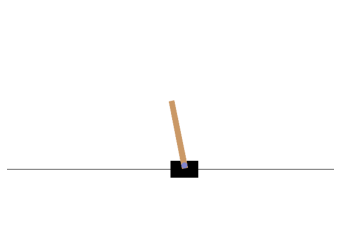

Step 19:
action: 1
observation: [ 0.2149881   0.8011621  -0.21890026 -1.512193  ]
reward: 1.0
done: True
info: {'TimeLimit.truncated': False}


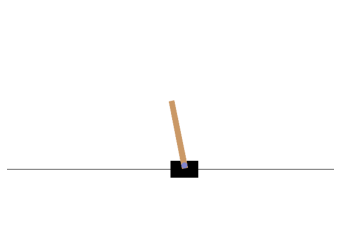

In [ ]:
env = gnwrapper.Animation(gym.make('CartPole-v1'))
env.reset()
for step_index in range(1000):
  env.render()
  action = env.action_space.sample()
  observation, reward, done, info = env.step(action)
  
  print('Step {}:'.format(step_index))
  print('action: {}'.format(action))
  print('observation: {}'.format(observation))
  print('reward: {}'.format(reward))
  print('done: {}'.format(done))
  print('info: {}'.format(info))
  if done:
    break

In [ ]:
env = gnwrapper.Animation(gym.make('CartPole-v1'))
env.reset()
goal_steps = 500
score_requirement = 60
intial_games = 10000

/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


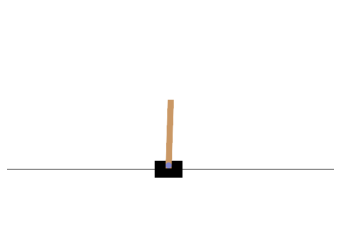

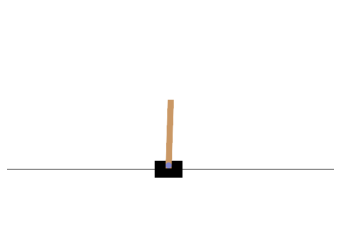

In [ ]:
env.render()

In [ ]:
def model_data_preparation():
  training_data = []
  accepted_scores = []
  for game_index in range(intial_games):
    score = 0
    game_memory = []
    previous_observation = []
    for step_index in range(goal_steps):
      action = random.randrange(0, 2)
      observation, reward, done, info = env.step(action)
            
      if len(previous_observation) > 0:
        game_memory.append([previous_observation, action])
                
      previous_observation = observation
      score += reward
      if done:
        break
            
      if score >= score_requirement:
        accepted_scores.append(score)
        for data in game_memory:
          if data[1] == 1:
            output = [0, 1]
          elif data[1] == 0:
            output = [1, 0]
          training_data.append([data[0], output])
        
    env.reset()

  print(accepted_scores)
  
  return training_data

In [ ]:
def build_model(input_size, output_size):
  model = Sequential()
  model.add(Dense(128, input_dim = input_size, activation = 'relu'))
  model.add(Dense(52, activation = 'relu'))
  model.add(Dense(output_size, activation = 'linear'))
  model.compile(loss = 'mse', optimizer = Adam())
  return model

In [ ]:
def train_model(training_data):
  X = np.array([i[0] for i in training_data]).reshape(-1, len(training_data[0][0]))
  y = np.array([i[1] for i in training_data]).reshape(-1, len(training_data[0][1]))
  model = build_model(input_size = len(X[0]), output_size = len(y[0]))
  model.fit(X, y, epochs = 10)
  return model

In [ ]:
training_data = model_data_preparation()
trained_model = train_model(training_data)

[60.0, 61.0, 62.0, 63.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 60.0, 61.0, 60.0, 61.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 60.0, 61.0, 62.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 60.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.

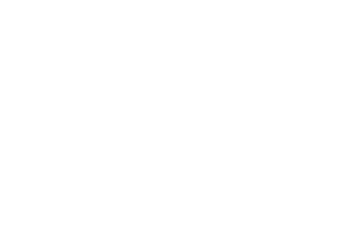

1/1 [==============================] - 0s 16ms/step
[152.0, 247.0, 256.0, 100.0, 122.0, 108.0, 96.0, 256.0, 230.0, 109.0, 180.0, 177.0, 315.0, 100.0, 173.0, 465.0, 244.0, 99.0, 208.0, 150.0, 101.0, 177.0, 103.0, 117.0, 175.0, 135.0, 343.0, 97.0, 267.0, 329.0, 203.0, 186.0, 358.0, 128.0, 93.0, 149.0, 229.0, 380.0, 84.0, 93.0, 78.0, 238.0, 304.0, 189.0, 154.0, 196.0, 79.0, 164.0, 103.0, 202.0, 162.0, 240.0, 146.0, 176.0, 76.0, 113.0, 86.0, 362.0, 274.0, 276.0, 80.0, 84.0, 85.0, 380.0, 214.0, 126.0, 282.0, 133.0, 126.0, 299.0, 86.0, 227.0, 128.0, 197.0, 222.0, 229.0, 95.0, 233.0, 249.0, 93.0, 127.0, 148.0, 332.0, 71.0, 162.0, 280.0, 157.0, 281.0, 173.0, 289.0, 280.0, 78.0, 386.0, 156.0, 134.0, 267.0, 101.0, 94.0, 126.0, 167.0]
Average Score: 185.29
choice 1:0.491931566733229  choice 0:0.508068433266771


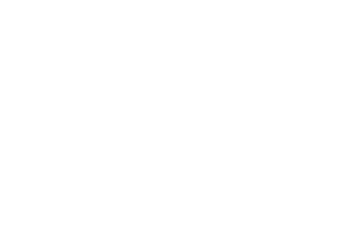

In [ ]:
scores = []
choices = []
for each_game in range(100):
  score = 0
  prev_obs = []
  for step_index in range(goal_steps):
    env.render()
    if len(prev_obs) == 0:
      action = random.randrange(0, 2)
    else:
      action = np.argmax(trained_model.predict(prev_obs.reshape(-1, len(prev_obs)))[0])
        
    choices.append(action)
    new_observation, reward, done, info = env.step(action)
    prev_obs = new_observation
    score+=reward
    if done:
      break

  env.reset()
  scores.append(score)

print(scores)
print('Average Score:', sum(scores)/len(scores))
print('choice 1:{}  choice 0:{}'.format(choices.count(1)/len(choices),choices.count(0)/len(choices)))